In [408]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [409]:
#read

advt = pd.read_csv('Downloads/day.csv')

advt.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [351]:
advt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [295]:
advt.shape

(730, 16)

In [296]:
advt.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [352]:
advt.head()

df = advt.drop(['instant', 'casual', 'registered','temp','dteday'],axis = 1)

df

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,11.58500,48.3333,23.500518,1796


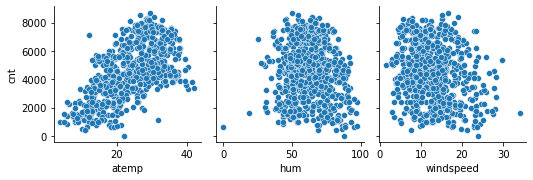

In [288]:
sns.pairplot(df , x_vars = ['atemp','hum','windspeed'], y_vars = 'cnt')

<AxesSubplot:>

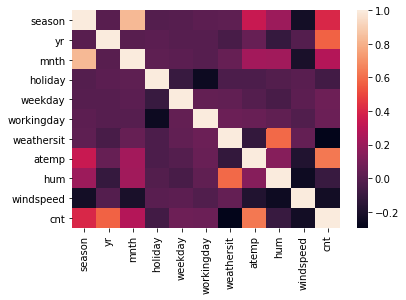

In [289]:
sns.heatmap(df.corr())

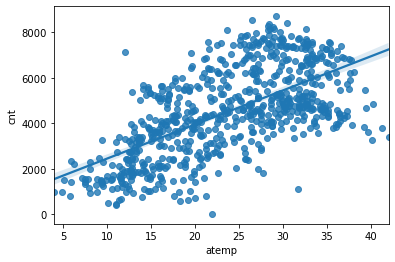

In [250]:
sns = sns.regplot(x= 'atemp', y = 'cnt', data = df) # atemp is linearly distributed we can consider it 

In [251]:
X = advt.loc[:,'atemp']
y = advt.loc[:,'cnt']

In [252]:
#   train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.70, random_state = 100)   

X_train

y_train

576    7216
426    4066
728    1796
482    4220
111    1683
       ... 
578    7261
53     1917
350    2739
79     2077
520    7001
Name: cnt, Length: 510, dtype: int64

In [253]:
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.params




const    814.259191
atemp    156.214183
dtype: float64

In [254]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     367.6
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           4.77e-62
Time:                        13:28:29   Log-Likelihood:                -4448.0
No. Observations:                 510   AIC:                             8900.
Df Residuals:                     508   BIC:                             8909.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        814.2592    202.479      4.021      0.000     416.459    1212.059
atemp        156.2142      8.148     19.173      0.000     140.207     172.221
==============================================================================
Omnibus:                        3.256   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                2.759
Skew:                           0.081   Prob(JB):                        0.252
Kurtosis:                       2.678   Cond. No.                         76.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

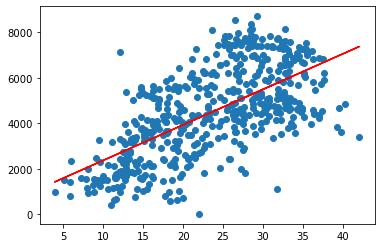

In [255]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 814.259191 + 156.214183*X_train, 'r')
plt.show()

##  || Residual Analysis ||

In [256]:
y_train_pred = lr_model.predict(X_train_sm)

res = y_train - y_train_pred

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'EROR TERM')

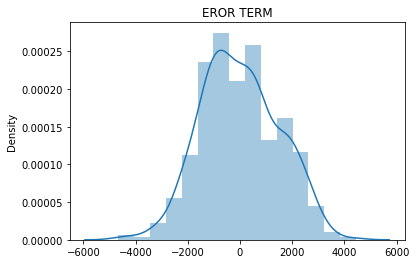

In [290]:
# Plotting histogram

fig = plt.figure()

sns.distplot(res, bins = 15)

plt.title ('EROR TERM')


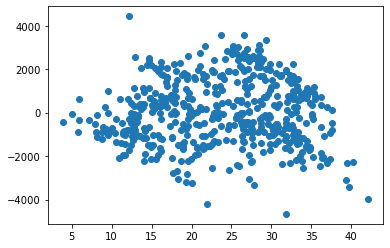

In [208]:
plt.scatter(X_train, res)

In [258]:
X_test_sm = sm.add_constant(X_test)

y_test_pred = lr_model.predict(X_test_sm)

y_test_pred

184    6011.637846
535    6445.585226
299    4384.112569
221    6164.462182
152    5843.902867
          ...     
702    4477.903564
127    4867.493926
640    5493.912801
72     3407.414631
653    4413.793263
Length: 220, dtype: float64

In [259]:
from sklearn.metrics import r2_score

r_square  = r2_score(y_test, y_test_pred)

r_square

0.3406801819399434

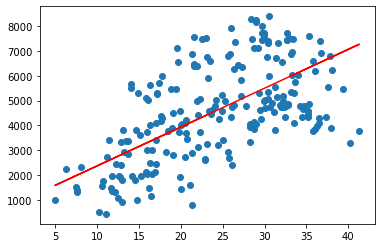

In [260]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

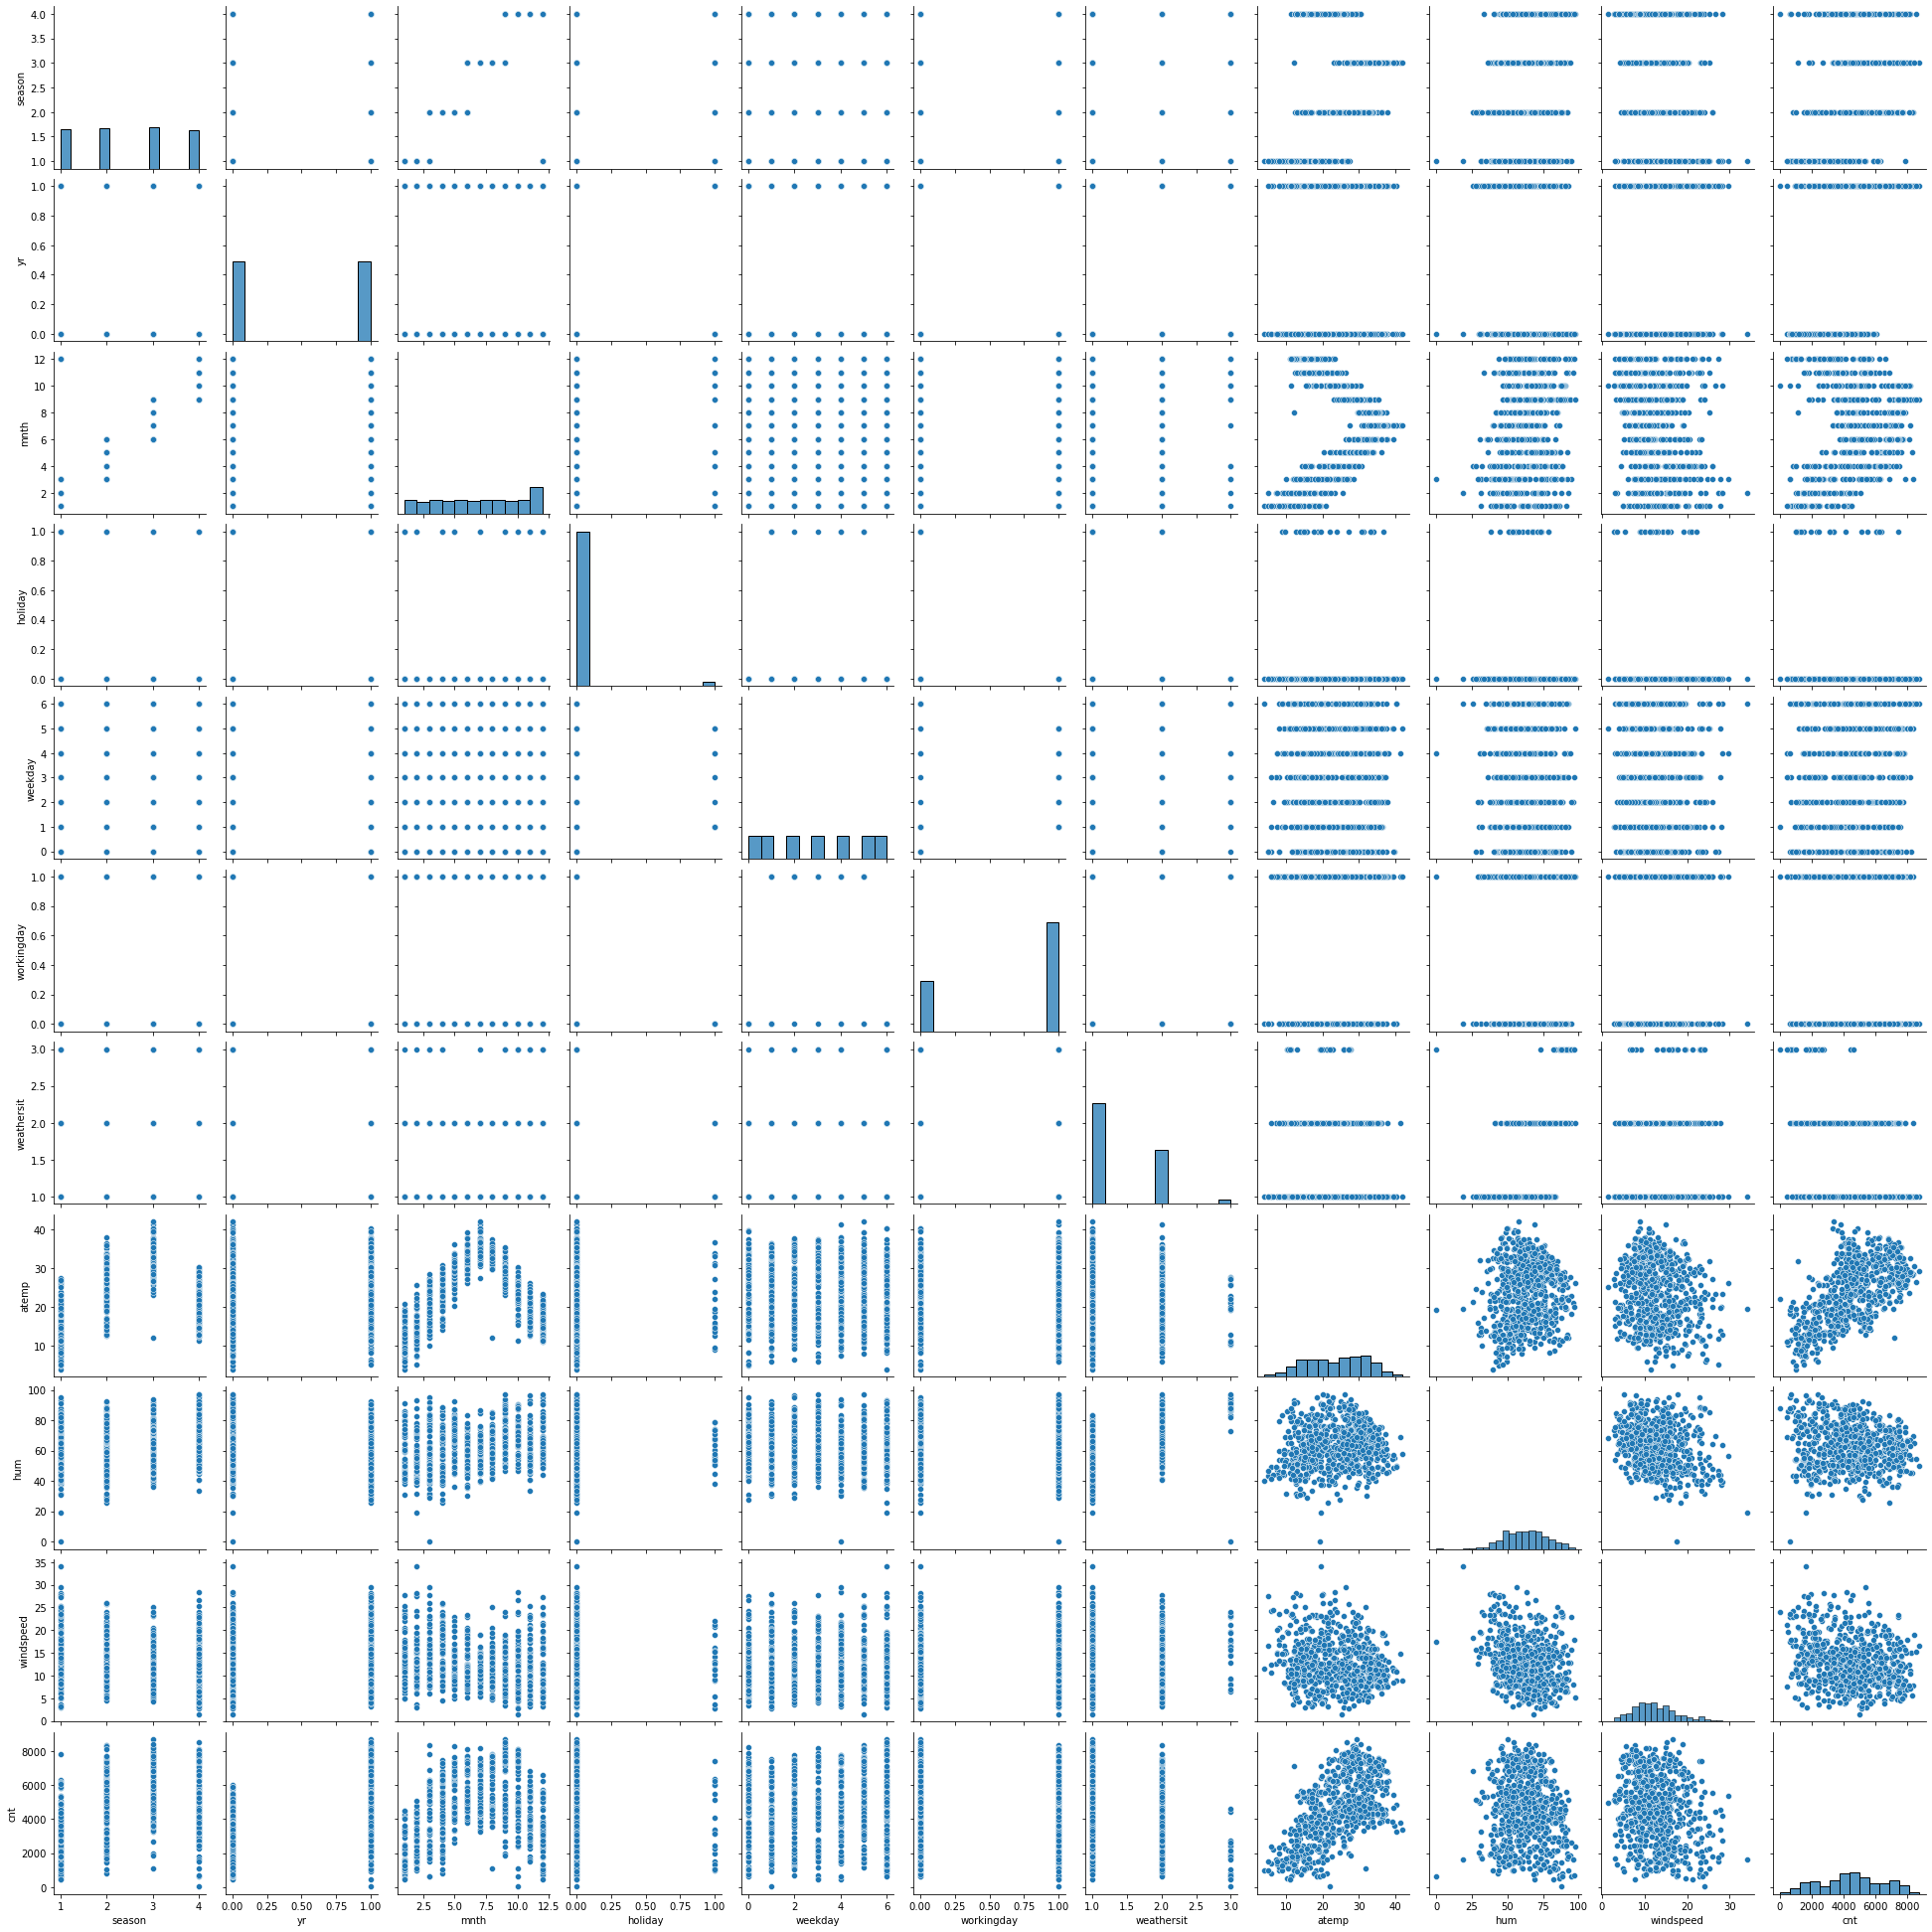

In [215]:
sns.pairplot(df)

plt.show()

In [353]:
df.head()

df.drop(['holiday'], axis = 1)

,season,yr,mnth,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,3,1,1,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,4,1,2,11.33210,65.2917,23.458911,2114
726,1,1,12,5,1,2,12.75230,59.0000,10.416557,3095
727,1,1,12,6,0,2,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,1,11.58500,48.3333,23.500518,1796


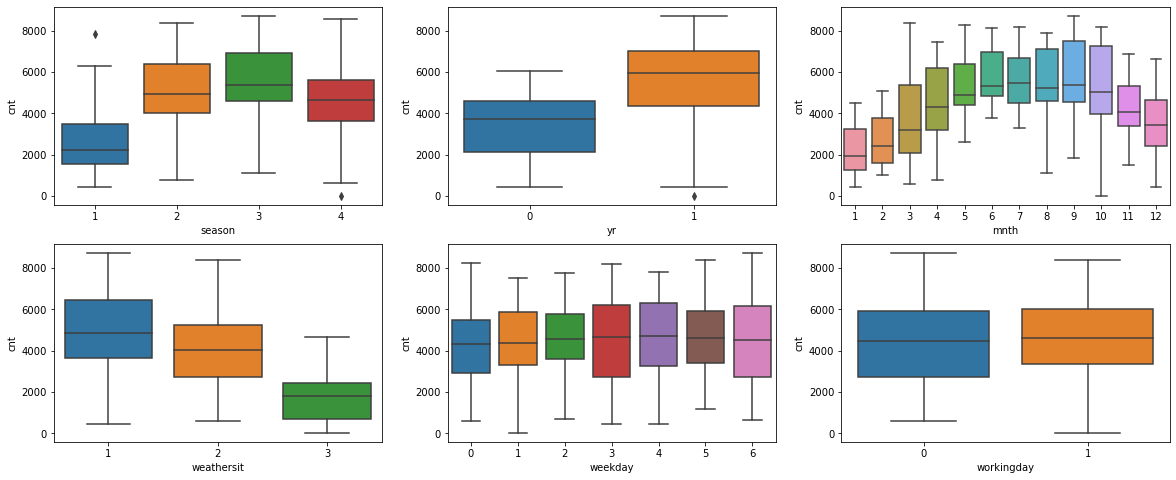

In [216]:
plt.figure(figsize=(20,8))

plt.subplot(2,3,1)

sns.boxplot(x= 'season', y = 'cnt' , data = df)

plt.subplot(2,3,2)

sns.boxplot(x= 'yr', y = 'cnt' , data = df)

plt.subplot(2,3,3)

sns.boxplot(x= 'mnth', y = 'cnt' , data = df)

plt.subplot(2,3,4)

sns.boxplot(x= 'weathersit', y = 'cnt' , data = df)

plt.subplot(2,3,5)

sns.boxplot(x= 'weekday', y = 'cnt' , data = df)

plt.subplot(2,3,6)

sns.boxplot(x= 'workingday', y = 'cnt' , data = df)
plt.show()

In [354]:
df = df.drop(['workingday'], axis = 1)

In [355]:
X = df.loc[:,['atemp', 'hum','windspeed']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.70, random_state = 100)   

X_train


X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.params


   

const        3488.685408
atemp         156.088809
hum           -29.508018
windspeed     -63.017519
dtype: float64

In [166]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     152.8
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           1.67e-70
Time:                        13:13:20   Log-Likelihood:                -4422.4
No. Observations:                 510   AIC:                             8853.
Df Residuals:                     506   BIC:                             8870.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3488.6854    413.698      8.433      0.000    2675.908    4301.463
atemp        156.0888      8.006     19.496      0.000     140.359     171.818
hum          -29.5080      4.638     -6.362      0.000     -38.621     -20.395
windspeed    -63.0175     12.519     -5.034      0.000     -87.613     -38.422
==============================================================================
Omnibus:                        1.276   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                1.360
Skew:                           0.091   Prob(JB):                        0.507
Kurtosis:                       2.824   Cond. No.                         461.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## hum and windspeed gives -ve coeff hence droping 

In [356]:
df = df.drop(['windspeed'],axis = 1)



In [357]:
df = df.drop(['hum'],axis = 1)
df.head()

,season,yr,mnth,holiday,weekday,weathersit,atemp,cnt
0,1,0,1,0,6,2,18.18125,985
1,1,0,1,0,0,2,17.68695,801
2,1,0,1,0,1,1,9.47025,1349
3,1,0,1,0,2,1,10.60610,1562
4,1,0,1,0,3,1,11.46350,1600


In [358]:
df.head()

,season,yr,mnth,holiday,weekday,weathersit,atemp,cnt
0,1,0,1,0,6,2,18.18125,985
1,1,0,1,0,0,2,17.68695,801
2,1,0,1,0,1,1,9.47025,1349
3,1,0,1,0,2,1,10.60610,1562
4,1,0,1,0,3,1,11.46350,1600


In [359]:
df.drop(['holiday'], axis = 1)



,season,yr,mnth,weekday,weathersit,atemp,cnt
0,1,0,1,6,2,18.18125,985
1,1,0,1,0,2,17.68695,801
2,1,0,1,1,1,9.47025,1349
3,1,0,1,2,1,10.60610,1562
4,1,0,1,3,1,11.46350,1600
...,...,...,...,...,...,...,...
725,1,1,12,4,2,11.33210,2114
726,1,1,12,5,2,12.75230,3095
727,1,1,12,6,2,12.12000,1341
728,1,1,12,0,1,11.58500,1796


In [360]:
status = pd.get_dummies(df['weathersit'],drop_first = True)

df = pd.concat([df, status], axis = 1)


In [361]:
df.drop(['weathersit'], axis = 1)

,season,yr,mnth,holiday,weekday,atemp,cnt,2,3
0,1,0,1,0,6,18.18125,985,1,0
1,1,0,1,0,0,17.68695,801,1,0
2,1,0,1,0,1,9.47025,1349,0,0
3,1,0,1,0,2,10.60610,1562,0,0
4,1,0,1,0,3,11.46350,1600,0,0
...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,11.33210,2114,1,0
726,1,1,12,0,5,12.75230,3095,1,0
727,1,1,12,0,6,12.12000,1341,1,0
728,1,1,12,0,0,11.58500,1796,0,0


In [362]:
df.rename({2 : 'Cloudy', 3: 'rainy'}, axis = 1, inplace = True)

df.head()

,season,yr,mnth,holiday,weekday,weathersit,atemp,cnt,Cloudy,rainy
0,1,0,1,0,6,2,18.18125,985,1,0
1,1,0,1,0,0,2,17.68695,801,1,0
2,1,0,1,0,1,1,9.47025,1349,0,0
3,1,0,1,0,2,1,10.60610,1562,0,0
4,1,0,1,0,3,1,11.46350,1600,0,0


In [371]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


num_vars = ['atemp']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

X_train.head()

<ipython-input-371-45c6f21dbef4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,atemp,yr,Cloudy,rainy
576,0.766351,1,0,0
426,0.438975,1,1,0
728,0.200348,1,0,0
482,0.391735,1,1,0
111,0.318819,0,1,0


In [363]:
X = df.loc[:,['atemp','yr' , 'Cloudy', 'rainy']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.70, random_state = 100)   

X_train


X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.params

const      470.191838
atemp      138.248484
yr        2020.256603
Cloudy    -568.490429
rainy    -2159.751141
dtype: float64

In [364]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     367.0
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          6.78e-148
Time:                        14:02:52   Log-Likelihood:                -4239.4
No. Observations:                 510   AIC:                             8489.
Df Residuals:                     505   BIC:                             8510.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        470.1918    146.482      3.210      0.001     182.402     757.982
atemp        138.2485      5.484     25.209      0.000     127.474     149.023
yr          2020.2566     88.386     22.857      0.000    1846.607    2193.907
Cloudy      -568.4904     93.425     -6.085      0.000    -752.040    -384.940
rainy      -2159.7511    262.596     -8.225      0.000   -2675.667   -1643.836
==============================================================================
Omnibus:                       17.326   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.182
Skew:                          -0.369   Prob(JB):                     4.14e-05
Kurtosis:                       3.636   Cond. No.                         150.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [365]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()

vif_data["feature"] = X_train.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data


,feature,VIF
0,atemp,2.201824
1,yr,1.872363
2,Cloudy,1.398547
3,rainy,1.028536


In [366]:
status1 = pd.get_dummies(df['season'],drop_first = True)

df = pd.concat([df,status1], axis = 1)

df





,season,yr,mnth,holiday,weekday,weathersit,atemp,cnt,Cloudy,rainy,2,3,4
0,1,0,1,0,6,2,18.18125,985,1,0,0,0,0
1,1,0,1,0,0,2,17.68695,801,1,0,0,0,0
2,1,0,1,0,1,1,9.47025,1349,0,0,0,0,0
3,1,0,1,0,2,1,10.60610,1562,0,0,0,0,0
4,1,0,1,0,3,1,11.46350,1600,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,2,11.33210,2114,1,0,0,0,0
726,1,1,12,0,5,2,12.75230,3095,1,0,0,0,0
727,1,1,12,0,6,2,12.12000,1341,1,0,0,0,0
728,1,1,12,0,0,1,11.58500,1796,0,0,0,0,0


In [372]:
df.rename({2 : 'summer', 3 : 'fall', 4: 'winter'}, axis = 1, inplace = True)

df.head()



,season,yr,mnth,holiday,weekday,weathersit,atemp,cnt,Cloudy,rainy,summer,fall,winter
0,1,0,1,0,6,2,18.18125,985,1,0,0,0,0
1,1,0,1,0,0,2,17.68695,801,1,0,0,0,0
2,1,0,1,0,1,1,9.47025,1349,0,0,0,0,0
3,1,0,1,0,2,1,10.60610,1562,0,0,0,0,0
4,1,0,1,0,3,1,11.46350,1600,0,0,0,0,0


In [370]:
df.drop(['weathersit','holiday', 'weekday'], axis = 1)





,season,yr,mnth,atemp,cnt,Cloudy,rainy,summer,fall,winter
0,1,0,1,18.18125,985,1,0,0,0,0
1,1,0,1,17.68695,801,1,0,0,0,0
2,1,0,1,9.47025,1349,0,0,0,0,0
3,1,0,1,10.60610,1562,0,0,0,0,0
4,1,0,1,11.46350,1600,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,11.33210,2114,1,0,0,0,0
726,1,1,12,12.75230,3095,1,0,0,0,0
727,1,1,12,12.12000,1341,1,0,0,0,0
728,1,1,12,11.58500,1796,0,0,0,0,0


In [377]:
X = df.loc[:,['atemp','yr' , 'Cloudy', 'rainy', 'summer', 'fall', 'winter']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.70, random_state = 100)   

X_train




,atemp,yr,Cloudy,rainy,summer,fall,winter
576,33.14480,1,0,0,0,1,0
426,20.67460,1,1,0,0,0,0
728,11.58500,1,0,0,0,0,0
482,18.87520,1,1,0,1,0,0
111,16.09770,0,1,0,1,0,0
...,...,...,...,...,...,...,...
578,35.35440,1,0,0,0,1,0
53,12.28585,0,0,0,0,0,0
350,12.46855,0,1,0,0,0,1
79,20.48675,0,1,0,1,0,0


In [378]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


num_vars = ['atemp']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

X_train.head()

<ipython-input-378-45c6f21dbef4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,atemp,yr,Cloudy,rainy,summer,fall,winter
576,0.766351,1,0,0,0,1,0
426,0.438975,1,1,0,0,0,0
728,0.200348,1,0,0,0,0,0
482,0.391735,1,1,0,1,0,0
111,0.318819,0,1,0,1,0,0


In [379]:
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.params

const      690.998340
atemp     4217.661511
yr        2039.017309
Cloudy    -628.055039
rainy    -2471.496477
summer    1104.264783
fall       964.060965
winter    1448.354450
dtype: float64

In [380]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     296.4
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          9.04e-174
Time:                        14:09:48   Log-Likelihood:                -4169.8
No. Observations:                 510   AIC:                             8356.
Df Residuals:                     502   BIC:                             8389.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        690.9983    126.833      5.448      0.000     441.809     940.187
atemp       4217.6615    313.659     13.447      0.000    3601.415    4833.908
yr          2039.0173     77.448     26.328      0.000    1886.856    2191.179
Cloudy      -628.0550     81.965     -7.662      0.000    -789.093    -467.017
rainy      -2471.4965    231.500    -10.676      0.000   -2926.324   -2016.669
summer      1104.2648    140.320      7.870      0.000     828.578    1379.951
fall         964.0610    181.385      5.315      0.000     607.693    1320.429
winter      1448.3544    120.138     12.056      0.000    1212.320    1684.389
==============================================================================
Omnibus:                       74.109   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.378
Skew:                          -0.721   Prob(JB):                     1.38e-43
Kurtosis:                       5.685   Cond. No.                         13.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [381]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()

vif_data["feature"] = X_train.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data


,feature,VIF
0,atemp,10.546904
1,yr,1.943957
2,Cloudy,1.456831
3,rainy,1.047489
4,summer,3.267308
5,fall,4.824794
6,winter,2.403476


In [382]:
y_train_pred = lr_model.predict(X_train_sm)

res = y_train - y_train_pred

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'EROR TERM')

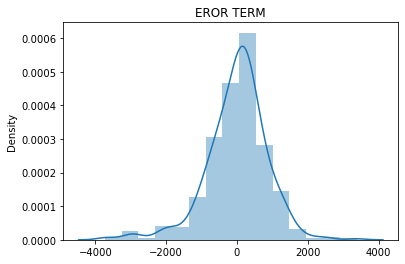

In [383]:
fig = plt.figure()

sns.distplot(res, bins = 15)

plt.title ('EROR TERM')


In [391]:

X_test_sm = sm.add_constant(X_test)

y_test_pred = lr_model.predict(X_test_sm)

y_test_pred

184    141352.187736
535    155875.705812
299     97894.563890
221    146106.381031
152    137591.732546
           ...      
702    103093.920209
127    111229.450157
640    129897.324752
72      70704.179416
653    101362.991925
Length: 220, dtype: float64

In [392]:
from sklearn.metrics import r2_score

r_square  = r2_score(y_test, y_test_pred)

r_square

-3086.628862690249